In [1]:
import pandas as pd
import numpy as np

from backtesting.test import SMA
from backtesting import Strategy
from backtesting.lib import crossover

from matplotlib import pyplot as plt

C:\Users\lexik\.conda\envs\quant\lib\site-packages\backtesting\_plotting.py:44: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
import hurst

In [3]:
min_lookback=max_lookback=20
ts = hurst.random_walk(1000, proba=0.5, min_lookback=min_lookback)

In [4]:
ts = 100 + pd.Series(ts)

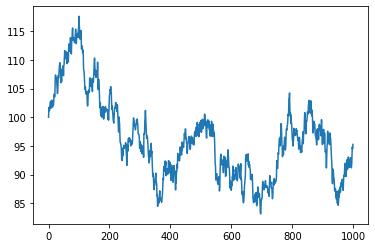

In [5]:
ts.plot()

In [7]:
df = pd.DataFrame(ts, columns=['Close'])
df['Change'] = df['Close'].diff()

In [443]:
def momentum_strategy(ts, period, type_ret):
    
    ts['returns'] = ts[['Close']].diff(period).fillna(0)
    ts['returns2'] = ts[['Close']].diff(period).fillna(0).shift(period).fillna(0)
    
    ts['entry'] = np.sign(ts['returns'] * ts.returns2) # signal
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns) # signal up, down
    ts['shift_returns'] = ts.returns.shift(-1).fillna(0)
    ts['shift_Change'] = ts['Change'].shift(-1).fillna(0)
    if type_ret == 1:
        ts['val'] = ts.shift_returns * ts.direction
    else:
        ts['val'] = ts.shift_Change * ts.direction
    return ts #ts[(ts.entry==1) & (ts.val > 0) ].val.sum() / (ts[(ts.entry==1) & (ts.val < 0) ].val.abs().sum())  #.dropna()

def mean_reversal(ts, period, type_ret):
    
    ts['returns'] = ts[['Close']].diff(period).fillna(0)
    ts['returns2'] = ts[['Close']].diff(period).fillna(0).shift(period).fillna(0)
    
    ts['entry'] = np.sign(ts['returns'] * ts.returns2) * (-1) # signal
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns * (-1)) # signal up, down
    ts['shift_returns'] = ts.returns.shift(-1).fillna(0)
    ts['shift_Change'] = ts['Change'].shift(-1).fillna(0)
    ts['val'] = ts.shift_returns * ts.direction
    if type_ret == 1:
        ts['val'] = ts.shift_returns * ts.direction
    else:
        ts['val'] = ts.shift_Change * ts.direction
    return ts #ts[(ts.entry==1) & (ts.val > 0) ].val.sum() / (ts[(ts.entry==1) & (ts.val < 0) ].val.abs().sum())  #.dropna()


def mean_reversal2(ts, period, type_ret):
    
    ts['returns'] = ts[['Close']].diff(period).fillna(0)
    ts['returns2'] = ts[['Close']].diff(period).fillna(0).shift(period).fillna(0)
    
    ts['entry'] = np.sign(ts['returns'] * ts.returns2)  # signal
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns * (-1)) # signal up, down
    ts['shift_returns'] = ts.returns.shift(-1).fillna(0)
    ts['shift_Change'] = ts['Change'].shift(-1).fillna(0)
    ts['val'] = ts.shift_returns * ts.direction
    if type_ret == 1:
        ts['val'] = ts.shift_returns * ts.direction
    else:
        ts['val'] = ts.shift_Change * ts.direction
    return ts #ts[(ts.entry==1) & (ts.val > 0) ].val.sum() / (ts[(ts.entry==1) & (ts.val < 0) ].val.abs().sum())  #.dropna()


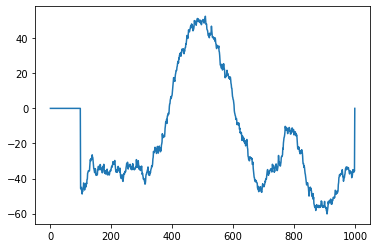

In [444]:
res.shift_returns.plot()

In [467]:
res =mean_reversal(df.dropna(), 10,0)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

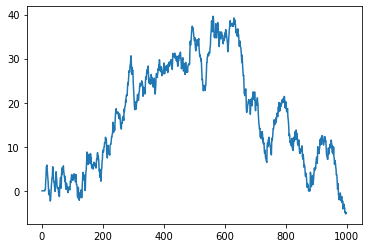

In [468]:
res.val.cumsum().plot()

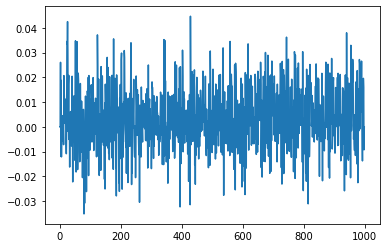

In [254]:
res.val.plot()

In [145]:
### mean reversal with type 1 doesn't work at all, except period 1
### mean reversal2 with type 1 doesn't work at all, except period 1

In [ ]:
## type 1 momentum strange winning

In [ ]:
# 0

In [469]:
df

,Close,Change
0,100.000000,NaN
1,101.425691,1.425691
2,101.593622,0.167931
3,100.834688,-0.758933
4,99.450006,-1.384683
...,...,...
995,78.718746,-1.129194
996,78.871663,0.152916
997,78.695411,-0.176252
998,78.422956,-0.272455


In [470]:
def hurstF(ts):
    lags = range(2, 20)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    # plot on log-log scale
    #plt.plot(np.log(lags), np.log(tau)); plt.show()
    # calculate Hurst as slope of log-log plot
    #print(lags, tau)
    m = np.polyfit(np.log(lags), np.log(tau), 1)

 
    hurst = m[0]*2.0
    #print ('hurst = ',hurst)
    #plt.clf(), plt.close()
    return hurst


In [476]:
df['hurstF']=df[['Close']].rolling(100).apply(hurstF, raw=True)

In [507]:
res = momentum_strategy(df.dropna(), 5, 0)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [506]:
res

,Close,Change,hurstF,returns,returns2,entry,direction,shift_returns,shift_Change,val
99,88.247867,0.616744,0.447656,0.000000,0.000000,0.0,0.0,0.035485,0.035485,0.000000
100,88.283352,0.035485,0.448874,0.035485,0.000000,0.0,1.0,-0.742896,-0.742896,-0.742896
101,87.540456,-0.742896,0.450175,-0.742896,0.035485,-1.0,-1.0,-0.509925,-0.509925,0.509925
102,87.030531,-0.509925,0.452524,-0.509925,-0.742896,1.0,-1.0,0.191719,0.191719,-0.191719
103,87.222250,0.191719,0.453721,0.191719,-0.509925,-1.0,1.0,-0.167876,-0.167876,-0.167876
...,...,...,...,...,...,...,...,...,...,...
995,78.718746,-1.129194,0.344063,-1.129194,0.262050,-1.0,-1.0,0.152916,0.152916,-0.152916
996,78.871663,0.152916,0.342518,0.152916,-1.129194,-1.0,1.0,-0.176252,-0.176252,-0.176252
997,78.695411,-0.176252,0.340897,-0.176252,0.152916,-1.0,-1.0,-0.272455,-0.272455,0.272455
998,78.422956,-0.272455,0.339370,-0.272455,-0.176252,1.0,-1.0,0.295886,0.295886,-0.295886


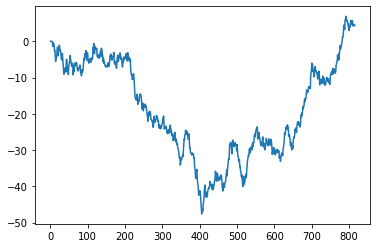

In [518]:
res[res.hurstF > 0.3].reset_index().val.cumsum().plot()

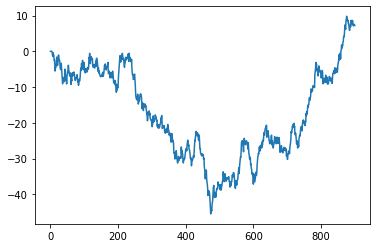

In [508]:
res.reset_index().val.cumsum().plot()

In [8]:
100

100

In [12]:
100/np.sqrt(100)

10.0

In [13]:
10/np.sqrt(1000)

0.31622776601683794